In [1]:
import pandas as pd
import numpy as np
#import geopandas
#import shapely.geometry as geom
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

## Reading and Preparing Estimated Trips Zones data

In [2]:
est_trips_zones = pd.read_csv('/local/tarciso/data/od-matrix/est-trips-zones-all.csv', 
                             usecols=['cardNum','date','cod_zona_o','cod_macrozona_o','cod_zona_d','cod_macrozona_d'],
                             parse_dates=['date']) \
                        .rename(index=str, columns={'cod_macrozona_o':'cod_macrozone_o',
                                                    'cod_macrozona_d':'cod_macrozone_d'})

## Generating All Estimated Trips OD Matrix for Macrozones

In [3]:
est_trips_zones.head()

,cardNum,date,cod_zona_o,cod_macrozone_o,cod_zona_d,cod_macrozone_d
0,324934.0,2017-05-01,371,2.0,303,1.0
1,324934.0,2017-05-01,301,1.0,441,1.0
2,324934.0,2017-05-01,421,1.0,303,1.0
3,326014.0,2017-05-01,801,5.0,321,1.0
4,334095.0,2017-05-01,541,2.0,362,1.0


In [4]:
len(est_trips_zones)

3187680

### Add Macrozones Names

In [5]:
ctba_macrozones_data = pd.read_csv('/local/tarciso/data/pesquisa-od-ctba/shapefiles/ctba_macrozones_data.csv')

In [6]:
ctba_macrozones_data

,cod_macrozone,name_macrozone,area_km2,population,pop_density,pop_proportion
0,1.0,Matriz,35.93,208674,5807.792931,0.110176
1,2.0,Portão,24.37,184437,7568.198605,0.097380
2,3.0,Cajuru,35.76,232563,6503.439597,0.122789
3,4.0,Santa Felicidade,62.22,166525,2676.390228,0.087922
4,5.0,Boa Vista,62.51,268556,4296.208607,0.141793
5,6.0,Boqueirão,39.81,205248,5155.689525,0.108367
6,7.0,Pinheirinho,24.71,151202,6119.061109,0.079832
7,8.0,CIC,63.46,200271,3155.861960,0.105740
8,9.0,Bairro Novo,45.01,163651,3635.880915,0.086405
9,10.0,Tatuquara,41.03,112873,2750.987083,0.059595


In [7]:
est_trips_zones = est_trips_zones.merge(ctba_macrozones_data.filter(['cod_macrozone','name_macrozone']).add_suffix('_o')) \
                        .merge(ctba_macrozones_data.filter(['cod_macrozone','name_macrozone']).add_suffix('_d'))

In [8]:
all_est_macrozones_trips = est_trips_zones.groupby(['cod_macrozone_o','name_macrozone_o','cod_macrozone_d','name_macrozone_d']).cardNum.count().reset_index(name='num_trips')

In [9]:
all_est_macrozones_trips

,cod_macrozone_o,name_macrozone_o,cod_macrozone_d,name_macrozone_d,num_trips
0,1.0,Matriz,1.0,Matriz,244964
1,1.0,Matriz,2.0,Portão,107054
2,1.0,Matriz,3.0,Cajuru,112093
3,1.0,Matriz,4.0,Santa Felicidade,62696
4,1.0,Matriz,5.0,Boa Vista,116371
5,1.0,Matriz,6.0,Boqueirão,128468
6,1.0,Matriz,7.0,Pinheirinho,45207
7,1.0,Matriz,8.0,CIC,49829
8,1.0,Matriz,9.0,Bairro Novo,34401
9,1.0,Matriz,10.0,Tatuquara,11191


In [10]:
all_est_macrozones_freqs = all_est_macrozones_trips.pivot(index='name_macrozone_o',columns='name_macrozone_d',values='num_trips') \
                                                .reindex(ctba_macrozones_data.name_macrozone, axis=0) \
                                                .reindex(ctba_macrozones_data.name_macrozone, axis=1)

In [11]:
all_est_macrozones_freqs

name_macrozone,Matriz,Portão,Cajuru,Santa Felicidade,Boa Vista,Boqueirão,Pinheirinho,CIC,Bairro Novo,Tatuquara
name_macrozone,,,,,,,,,,
Matriz,244964,107054,112093,62696,116371,128468,45207,49829,34401,11191
Portão,112819,56018,19678,18328,12373,39770,44274,49052,23613,15558
Cajuru,154721,18814,43583,8254,14909,27769,10310,8225,4818,1657
Santa Felicidade,98477,14376,3851,36653,8688,3069,4826,15781,1443,1175
Boa Vista,150767,12492,14327,11544,51784,6342,4223,4802,1316,679
Boqueirão,152699,34030,27328,5848,7899,72546,26256,13669,22235,6222
Pinheirinho,76566,40026,10122,7729,4182,26766,30207,24891,17621,16928
CIC,85470,48875,5936,17935,3973,11703,21810,47956,7941,11446
Bairro Novo,68670,25335,4712,3209,1898,22899,19217,8711,12898,2720


In [12]:
all_est_macrozones_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/all_est_macrozones_freqs.csv')

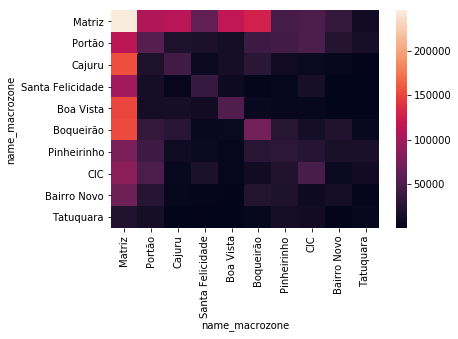

In [13]:
sns.heatmap(all_est_macrozones_freqs)

In [14]:
all_est_macrozones_norm_freqs = all_est_macrozones_freqs/all_est_macrozones_freqs.values.sum()

In [15]:
all_est_macrozones_norm_freqs

name_macrozone,Matriz,Portão,Cajuru,Santa Felicidade,Boa Vista,Boqueirão,Pinheirinho,CIC,Bairro Novo,Tatuquara
name_macrozone,,,,,,,,,,
Matriz,0.077042,0.033669,0.035254,0.019718,0.036599,0.040404,0.014218,0.015671,0.010819,0.003520
Portão,0.035482,0.017618,0.006189,0.005764,0.003891,0.012508,0.013924,0.015427,0.007426,0.004893
Cajuru,0.048660,0.005917,0.013707,0.002596,0.004689,0.008733,0.003243,0.002587,0.001515,0.000521
Santa Felicidade,0.030971,0.004521,0.001211,0.011528,0.002732,0.000965,0.001518,0.004963,0.000454,0.000370
Boa Vista,0.047417,0.003929,0.004506,0.003631,0.016286,0.001995,0.001328,0.001510,0.000414,0.000214
Boqueirão,0.048024,0.010703,0.008595,0.001839,0.002484,0.022816,0.008258,0.004299,0.006993,0.001957
Pinheirinho,0.024080,0.012588,0.003183,0.002431,0.001315,0.008418,0.009500,0.007828,0.005542,0.005324
CIC,0.026881,0.015371,0.001867,0.005641,0.001250,0.003681,0.006859,0.015082,0.002497,0.003600
Bairro Novo,0.021597,0.007968,0.001482,0.001009,0.000597,0.007202,0.006044,0.002740,0.004056,0.000855


In [16]:
all_est_macrozones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/all_est_macrozones_norm_freqs.csv')

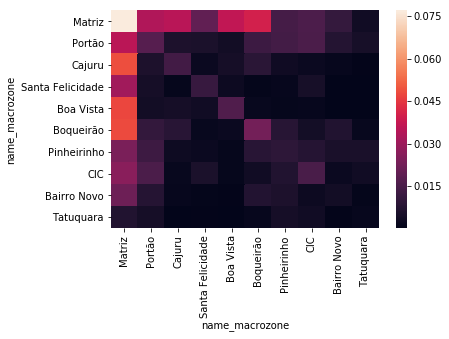

In [17]:
sns.heatmap(all_est_macrozones_norm_freqs)

## Generating Estimated Trips OD Matrix for Zones

In [18]:
all_est_zones_trips = est_trips_zones.groupby(['cod_zona_o','cod_zona_d']).cardNum.count().reset_index(name='num_pass')

In [19]:
all_est_zones_trips

,cod_zona_o,cod_zona_d,num_pass
0,301,301,188
1,301,302,550
2,301,303,512
3,301,311,121
4,301,321,378
5,301,331,290
6,301,341,1703
7,301,351,5352
8,301,361,1138
9,301,362,778


In [20]:
all_est_zones_freqs = all_est_zones_trips.pivot(index='cod_zona_o',columns='cod_zona_d',values='num_pass').fillna(0)

In [21]:
all_est_zones_freqs

cod_zona_d,301,302,303,311,321,331,341,351,361,362,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
301,188.0,550.0,512.0,121.0,378.0,290.0,1703.0,5352.0,1138.0,778.0,...,546.0,168.0,494.0,168.0,222.0,382.0,84.0,49.0,601.0,104.0
302,575.0,18.0,57.0,91.0,426.0,1.0,555.0,163.0,61.0,151.0,...,23.0,45.0,27.0,29.0,24.0,169.0,194.0,256.0,1192.0,233.0
303,50.0,991.0,1392.0,78.0,5182.0,2457.0,2421.0,12891.0,3546.0,640.0,...,1314.0,1302.0,1527.0,392.0,969.0,1346.0,3502.0,3349.0,4036.0,3594.0
311,204.0,90.0,202.0,310.0,57.0,8.0,212.0,70.0,62.0,448.0,...,2.0,8.0,7.0,2.0,3.0,37.0,35.0,16.0,42.0,28.0
321,425.0,488.0,1330.0,91.0,53.0,2.0,432.0,177.0,107.0,226.0,...,62.0,54.0,90.0,29.0,37.0,97.0,169.0,128.0,140.0,96.0
331,2316.0,34.0,2320.0,29.0,153.0,3.0,105.0,119.0,23.0,35.0,...,38.0,42.0,76.0,61.0,50.0,69.0,10.0,7.0,29.0,16.0
341,2440.0,1103.0,1379.0,1096.0,314.0,79.0,25.0,318.0,329.0,221.0,...,53.0,34.0,77.0,27.0,47.0,47.0,185.0,124.0,461.0,133.0
351,2526.0,583.0,3725.0,134.0,192.0,78.0,188.0,27.0,718.0,404.0,...,241.0,139.0,200.0,87.0,82.0,74.0,295.0,181.0,655.0,544.0
361,990.0,69.0,5345.0,240.0,157.0,29.0,83.0,137.0,83.0,59.0,...,112.0,119.0,157.0,40.0,40.0,109.0,694.0,571.0,671.0,635.0


In [22]:
all_est_zones_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/all_est_zones_freqs.csv')

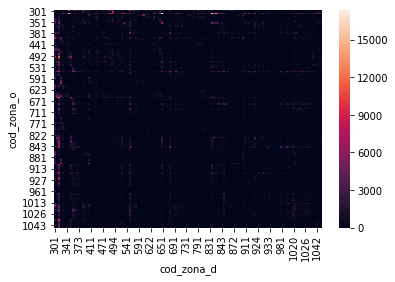

In [23]:
sns.heatmap(all_est_zones_freqs)

In [24]:
all_est_zones_norm_freqs = all_est_zones_freqs/all_est_zones_freqs.values.sum()

In [25]:
all_est_zones_norm_freqs

cod_zona_d,301,302,303,311,321,331,341,351,361,362,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
301,0.000059,1.729772e-04,1.610261e-04,3.805499e-05,0.000119,9.120618e-05,5.356004e-04,0.001683,0.000358,0.000245,...,1.717192e-04,5.283669e-05,0.000155,5.283669e-05,6.981991e-05,1.201406e-04,0.000026,1.541070e-05,1.890170e-04,3.270842e-05
302,0.000181,5.661073e-06,1.792673e-05,2.861987e-05,0.000134,3.145041e-07,1.745498e-04,0.000051,0.000019,0.000047,...,7.233594e-06,1.415268e-05,0.000008,9.120618e-06,7.548098e-06,5.315119e-05,0.000061,8.051304e-05,3.748889e-04,7.327945e-05
303,0.000016,3.116735e-04,4.377897e-04,2.453132e-05,0.001630,7.727365e-04,7.614144e-04,0.004054,0.001115,0.000201,...,4.132584e-04,4.094843e-04,0.000480,1.232856e-04,3.047545e-04,4.233225e-04,0.001101,1.053274e-03,1.269338e-03,1.130328e-03
311,0.000064,2.830537e-05,6.352982e-05,9.749626e-05,0.000018,2.516033e-06,6.667486e-05,0.000022,0.000019,0.000141,...,6.290082e-07,2.516033e-06,0.000002,6.290082e-07,9.435122e-07,1.163665e-05,0.000011,5.032065e-06,1.320917e-05,8.806114e-06
321,0.000134,1.534780e-04,4.182904e-04,2.861987e-05,0.000017,6.290082e-07,1.358658e-04,0.000056,0.000034,0.000071,...,1.949925e-05,1.698322e-05,0.000028,9.120618e-06,1.163665e-05,3.050690e-05,0.000053,4.025652e-05,4.403057e-05,3.019239e-05
331,0.000728,1.069314e-05,7.296495e-04,9.120618e-06,0.000048,9.435122e-07,3.302293e-05,0.000037,0.000007,0.000011,...,1.195116e-05,1.320917e-05,0.000024,1.918475e-05,1.572520e-05,2.170078e-05,0.000003,2.201529e-06,9.120618e-06,5.032065e-06
341,0.000767,3.468980e-04,4.337011e-04,3.446965e-04,0.000099,2.484582e-05,7.862602e-06,0.000100,0.000103,0.000070,...,1.666872e-05,1.069314e-05,0.000024,8.491610e-06,1.478169e-05,1.478169e-05,0.000058,3.899851e-05,1.449864e-04,4.182904e-05
351,0.000794,1.833559e-04,1.171528e-03,4.214355e-05,0.000060,2.453132e-05,5.912677e-05,0.000008,0.000226,0.000127,...,7.579548e-05,4.371607e-05,0.000063,2.736185e-05,2.578933e-05,2.327330e-05,0.000093,5.692524e-05,2.060002e-04,1.710902e-04
361,0.000311,2.170078e-05,1.681024e-03,7.548098e-05,0.000049,9.120618e-06,2.610384e-05,0.000043,0.000026,0.000019,...,3.522446e-05,3.742599e-05,0.000049,1.258016e-05,1.258016e-05,3.428094e-05,0.000218,1.795818e-04,2.110322e-04,1.997101e-04


In [26]:
all_est_zones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/all_est_zones_norm_freqs.csv')

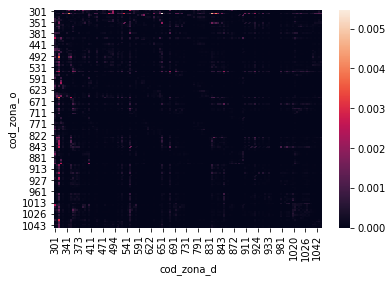

In [27]:
sns.heatmap(all_est_zones_norm_freqs)

# Re-running analysis for only weekdays

In [28]:
wday_est_trips_zones = est_trips_zones[est_trips_zones['date'].dt.dayofweek != 5]

In [29]:
len(wday_est_trips_zones)

3166606

In [30]:
len(est_trips_zones)

3179609

In [31]:
wday_est_trips_zones.head()

,cardNum,date,cod_zona_o,cod_macrozone_o,cod_zona_d,cod_macrozone_d,name_macrozone_o,name_macrozone_d
0,324934.0,2017-05-01,371,2.0,303,1.0,Portão,Matriz
1,334095.0,2017-05-01,541,2.0,362,1.0,Portão,Matriz
2,469927.0,2017-05-01,552,2.0,303,1.0,Portão,Matriz
3,679791.0,2017-05-01,552,2.0,302,1.0,Portão,Matriz
4,731445.0,2017-05-01,571,2.0,431,1.0,Portão,Matriz


## Generating Weekday Estimated Trips OD Matrix for Macrozones

In [32]:
wday_est_macrozones_trips = wday_est_trips_zones.groupby(['cod_macrozone_o','name_macrozone_o','cod_macrozone_d','name_macrozone_d']).cardNum.count().reset_index(name='num_trips')

In [33]:
wday_est_macrozones_trips

,cod_macrozone_o,name_macrozone_o,cod_macrozone_d,name_macrozone_d,num_trips
0,1.0,Matriz,1.0,Matriz,243596
1,1.0,Matriz,2.0,Portão,107053
2,1.0,Matriz,3.0,Cajuru,112093
3,1.0,Matriz,4.0,Santa Felicidade,62696
4,1.0,Matriz,5.0,Boa Vista,116371
5,1.0,Matriz,6.0,Boqueirão,122766
6,1.0,Matriz,7.0,Pinheirinho,45207
7,1.0,Matriz,8.0,CIC,49829
8,1.0,Matriz,9.0,Bairro Novo,34401
9,1.0,Matriz,10.0,Tatuquara,11191


In [34]:
wday_est_macrozones_freqs = wday_est_macrozones_trips.pivot(index='name_macrozone_o',columns='name_macrozone_d',values='num_trips') \
                                                .reindex(ctba_macrozones_data.name_macrozone, axis=0) \
                                                .reindex(ctba_macrozones_data.name_macrozone, axis=1)

In [35]:
wday_est_macrozones_freqs

name_macrozone,Matriz,Portão,Cajuru,Santa Felicidade,Boa Vista,Boqueirão,Pinheirinho,CIC,Bairro Novo,Tatuquara
name_macrozone,,,,,,,,,,
Matriz,243596,107053,112093,62696,116371,122766,45207,49829,34401,11191
Portão,112163,56018,19678,18328,12373,39770,44274,49052,23613,15558
Cajuru,154721,18814,43583,8254,14909,27769,10310,8225,4818,1657
Santa Felicidade,98477,14376,3851,36653,8688,3069,4826,15781,1443,1175
Boa Vista,150767,12492,14327,11544,51784,6342,4223,4802,1316,679
Boqueirão,149181,33718,27328,5848,7899,71123,26256,13669,22235,6222
Pinheirinho,76566,40026,10122,7729,4182,26766,30207,24891,17621,16928
CIC,85470,48875,5936,17935,3973,11703,21810,47956,7941,11446
Bairro Novo,68670,25335,4712,3209,1898,22899,19217,8711,12875,2720


In [36]:
wday_est_macrozones_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/wday_est_macrozones_freqs.csv')

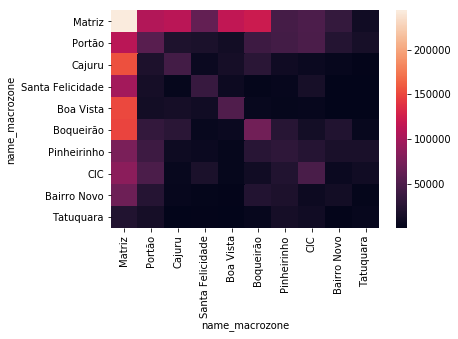

In [37]:
sns.heatmap(wday_est_macrozones_freqs)

In [38]:
wday_est_macrozones_norm_freqs = wday_est_macrozones_freqs/wday_est_macrozones_freqs.values.sum()

In [39]:
wday_est_macrozones_norm_freqs

name_macrozone,Matriz,Portão,Cajuru,Santa Felicidade,Boa Vista,Boqueirão,Pinheirinho,CIC,Bairro Novo,Tatuquara
name_macrozone,,,,,,,,,,
Matriz,0.076927,0.033807,0.035398,0.019799,0.036749,0.038769,0.014276,0.015736,0.010864,0.003534
Portão,0.035421,0.017690,0.006214,0.005788,0.003907,0.012559,0.013982,0.015490,0.007457,0.004913
Cajuru,0.048860,0.005941,0.013763,0.002607,0.004708,0.008769,0.003256,0.002597,0.001522,0.000523
Santa Felicidade,0.031099,0.004540,0.001216,0.011575,0.002744,0.000969,0.001524,0.004984,0.000456,0.000371
Boa Vista,0.047612,0.003945,0.004524,0.003646,0.016353,0.002003,0.001334,0.001516,0.000416,0.000214
Boqueirão,0.047111,0.010648,0.008630,0.001847,0.002494,0.022460,0.008292,0.004317,0.007022,0.001965
Pinheirinho,0.024179,0.012640,0.003196,0.002441,0.001321,0.008453,0.009539,0.007860,0.005565,0.005346
CIC,0.026991,0.015435,0.001875,0.005664,0.001255,0.003696,0.006888,0.015144,0.002508,0.003615
Bairro Novo,0.021686,0.008001,0.001488,0.001013,0.000599,0.007231,0.006069,0.002751,0.004066,0.000859


In [40]:
wday_est_macrozones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/wday_est_macrozones_norm_freqs.csv')

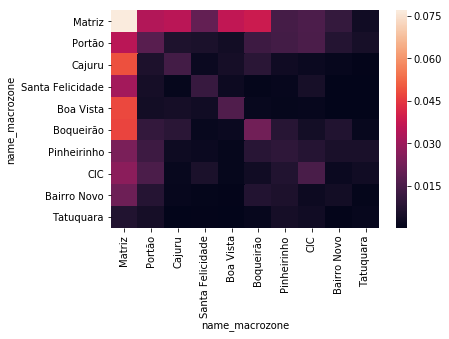

In [41]:
sns.heatmap(wday_est_macrozones_norm_freqs)

## Generating Weekday Estimated Trips OD Matrix for Zones

In [42]:
wday_est_zones_trips = wday_est_trips_zones.groupby(['cod_zona_o','cod_zona_d']).cardNum.count().reset_index(name='num_pass')

In [43]:
wday_est_zones_trips

,cod_zona_o,cod_zona_d,num_pass
0,301,301,188
1,301,302,550
2,301,303,512
3,301,311,121
4,301,321,378
5,301,331,290
6,301,341,1703
7,301,351,5352
8,301,361,1138
9,301,362,778


In [44]:
wday_est_zones_freqs = wday_est_zones_trips.pivot(index='cod_zona_o',columns='cod_zona_d',values='num_pass').fillna(0)

In [45]:
wday_est_zones_freqs

cod_zona_d,301,302,303,311,321,331,341,351,361,362,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
301,188.0,550.0,512.0,121.0,378.0,290.0,1703.0,5352.0,1138.0,778.0,...,546.0,168.0,494.0,168.0,222.0,382.0,84.0,49.0,601.0,104.0
302,575.0,18.0,57.0,91.0,426.0,1.0,555.0,163.0,61.0,151.0,...,23.0,45.0,27.0,29.0,24.0,169.0,194.0,256.0,1192.0,233.0
303,50.0,991.0,1392.0,78.0,5182.0,2457.0,2421.0,12891.0,3310.0,640.0,...,1314.0,1302.0,1527.0,392.0,969.0,1346.0,3502.0,3349.0,4036.0,3594.0
311,204.0,90.0,202.0,310.0,57.0,8.0,212.0,70.0,62.0,448.0,...,2.0,8.0,7.0,2.0,3.0,37.0,35.0,16.0,42.0,28.0
321,425.0,488.0,1330.0,91.0,53.0,2.0,432.0,177.0,107.0,226.0,...,62.0,54.0,90.0,29.0,37.0,97.0,169.0,128.0,140.0,96.0
331,2316.0,34.0,2320.0,29.0,153.0,3.0,105.0,119.0,23.0,35.0,...,38.0,42.0,76.0,61.0,50.0,69.0,10.0,7.0,29.0,16.0
341,2440.0,1103.0,1379.0,1096.0,314.0,79.0,25.0,318.0,329.0,221.0,...,53.0,34.0,77.0,27.0,47.0,47.0,185.0,124.0,461.0,133.0
351,2526.0,583.0,3725.0,134.0,192.0,78.0,188.0,27.0,718.0,404.0,...,241.0,139.0,200.0,87.0,82.0,74.0,295.0,181.0,655.0,544.0
361,990.0,69.0,5345.0,240.0,157.0,29.0,83.0,137.0,81.0,59.0,...,112.0,119.0,157.0,40.0,40.0,109.0,694.0,571.0,671.0,635.0


In [46]:
wday_est_zones_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/wday_est_zones_freqs.csv')

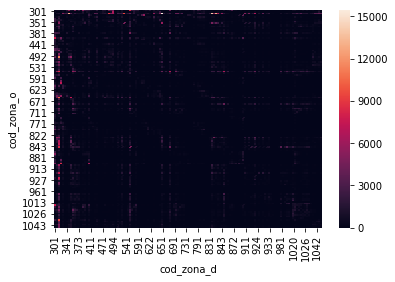

In [47]:
sns.heatmap(wday_est_zones_freqs)

In [48]:
wday_est_zones_norm_freqs = wday_est_zones_freqs/wday_est_zones_freqs.values.sum()

In [49]:
wday_est_zones_norm_freqs

cod_zona_d,301,302,303,311,321,331,341,351,361,362,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
301,0.000059,1.736875e-04,1.616873e-04,3.821126e-05,0.000119,9.158070e-05,5.377998e-04,0.001690,0.000359,0.000246,...,1.724244e-04,5.305365e-05,0.000156,5.305365e-05,7.010661e-05,1.206339e-04,0.000027,1.547398e-05,1.897931e-04,3.284273e-05
302,0.000182,5.684319e-06,1.800034e-05,2.873739e-05,0.000135,3.157955e-07,1.752665e-04,0.000051,0.000019,0.000048,...,7.263297e-06,1.421080e-05,0.000009,9.158070e-06,7.579093e-06,5.336944e-05,0.000061,8.084365e-05,3.764283e-04,7.358036e-05
303,0.000016,3.129534e-04,4.395874e-04,2.463205e-05,0.001636,7.759096e-04,7.645410e-04,0.004071,0.001045,0.000202,...,4.149553e-04,4.111658e-04,0.000482,1.237918e-04,3.060059e-04,4.250608e-04,0.001106,1.057599e-03,1.274551e-03,1.134969e-03
311,0.000064,2.842160e-05,6.379070e-05,9.789661e-05,0.000018,2.526364e-06,6.694865e-05,0.000022,0.000020,0.000141,...,6.315910e-07,2.526364e-06,0.000002,6.315910e-07,9.473866e-07,1.168443e-05,0.000011,5.052728e-06,1.326341e-05,8.842275e-06
321,0.000134,1.541082e-04,4.200080e-04,2.873739e-05,0.000017,6.315910e-07,1.364237e-04,0.000056,0.000034,0.000071,...,1.957932e-05,1.705296e-05,0.000028,9.158070e-06,1.168443e-05,3.063217e-05,0.000053,4.042183e-05,4.421137e-05,3.031637e-05
331,0.000731,1.073705e-05,7.326456e-04,9.158070e-06,0.000048,9.473866e-07,3.315853e-05,0.000038,0.000007,0.000011,...,1.200023e-05,1.326341e-05,0.000024,1.926353e-05,1.578978e-05,2.178989e-05,0.000003,2.210569e-06,9.158070e-06,5.052728e-06
341,0.000771,3.483225e-04,4.354820e-04,3.461119e-04,0.000099,2.494785e-05,7.894888e-06,0.000100,0.000104,0.000070,...,1.673716e-05,1.073705e-05,0.000024,8.526479e-06,1.484239e-05,1.484239e-05,0.000058,3.915864e-05,1.455817e-04,4.200080e-05
351,0.000798,1.841088e-04,1.176338e-03,4.231660e-05,0.000061,2.463205e-05,5.936956e-05,0.000009,0.000227,0.000128,...,7.610672e-05,4.389558e-05,0.000063,2.747421e-05,2.589523e-05,2.336887e-05,0.000093,5.715899e-05,2.068461e-04,1.717928e-04
361,0.000313,2.178989e-05,1.687927e-03,7.579093e-05,0.000050,9.158070e-06,2.621103e-05,0.000043,0.000026,0.000019,...,3.536910e-05,3.757967e-05,0.000050,1.263182e-05,1.263182e-05,3.442171e-05,0.000219,1.803192e-04,2.118988e-04,2.005302e-04


In [50]:
wday_est_zones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/wday_est_zones_norm_freqs.csv')

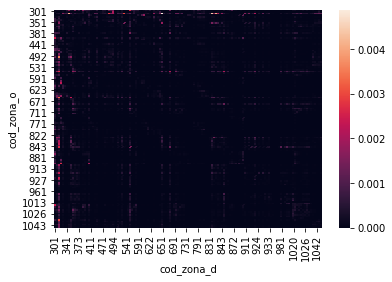

In [51]:
sns.heatmap(wday_est_zones_norm_freqs)

# Re-running analysis for only May

In [52]:
may_est_trips_zones = est_trips_zones[est_trips_zones['date'].dt.month == 5]

In [53]:
len(may_est_trips_zones)

1778450

In [54]:
len(est_trips_zones)

3179609

In [55]:
may_est_trips_zones.tail()

,cardNum,date,cod_zona_o,cod_macrozone_o,cod_zona_d,cod_macrozone_d,name_macrozone_o,name_macrozone_d
3148496,10092982.0,2017-05-30,651,6.0,841,6.0,Boqueirão,Boqueirão
3148497,10095715.0,2017-05-30,911,6.0,832,6.0,Boqueirão,Boqueirão
3148498,10095715.0,2017-05-30,832,6.0,833,6.0,Boqueirão,Boqueirão
3148499,10105999.0,2017-05-30,841,6.0,833,6.0,Boqueirão,Boqueirão
3148500,10105999.0,2017-05-30,833,6.0,841,6.0,Boqueirão,Boqueirão


## Generating May Estimated Trips OD Matrix for Macrozones

In [56]:
may_est_macrozones_trips = may_est_trips_zones.groupby(['cod_macrozone_o','name_macrozone_o','cod_macrozone_d','name_macrozone_d']).cardNum.count().reset_index(name='num_trips')

In [57]:
may_est_macrozones_trips

,cod_macrozone_o,name_macrozone_o,cod_macrozone_d,name_macrozone_d,num_trips
0,1.0,Matriz,1.0,Matriz,134227
1,1.0,Matriz,2.0,Portão,57387
2,1.0,Matriz,3.0,Cajuru,64270
3,1.0,Matriz,4.0,Santa Felicidade,30852
4,1.0,Matriz,5.0,Boa Vista,65431
5,1.0,Matriz,6.0,Boqueirão,69238
6,1.0,Matriz,7.0,Pinheirinho,27363
7,1.0,Matriz,8.0,CIC,27481
8,1.0,Matriz,9.0,Bairro Novo,20046
9,1.0,Matriz,10.0,Tatuquara,6949


In [58]:
may_est_macrozones_freqs = may_est_macrozones_trips.pivot(index='name_macrozone_o',columns='name_macrozone_d',values='num_trips') \
                                                .reindex(ctba_macrozones_data.name_macrozone, axis=0) \
                                                .reindex(ctba_macrozones_data.name_macrozone, axis=1)

In [59]:
may_est_macrozones_freqs

name_macrozone,Matriz,Portão,Cajuru,Santa Felicidade,Boa Vista,Boqueirão,Pinheirinho,CIC,Bairro Novo,Tatuquara
name_macrozone,,,,,,,,,,
Matriz,134227,57387,64270,30852,65431,69238,27363,27481,20046,6949
Portão,61467,31523,11047,9446,6523,21115,25376,27220,13656,9217
Cajuru,85700,10844,25788,4265,8303,15947,6215,4758,2926,1037
Santa Felicidade,47114,7686,2168,17840,4057,1603,2660,7955,848,712
Boa Vista,84242,6886,8256,5671,29236,3487,2414,2675,762,402
Boqueirão,84905,19552,15520,3000,4115,41438,14999,7772,12681,3770
Pinheirinho,44537,22251,5940,4168,2271,14442,17573,14163,10130,10035
CIC,48279,27960,3575,9707,2248,6933,12749,28105,4814,6928
Bairro Novo,41375,15105,2968,1933,1119,13627,11329,5206,7652,1674


In [60]:
may_est_macrozones_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/may_est_macrozones_freqs.csv')

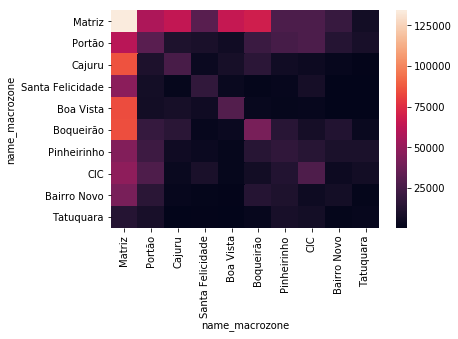

In [61]:
sns.heatmap(may_est_macrozones_freqs)

In [62]:
may_est_macrozones_norm_freqs = may_est_macrozones_freqs/may_est_macrozones_freqs.values.sum()

In [63]:
may_est_macrozones_norm_freqs

name_macrozone,Matriz,Portão,Cajuru,Santa Felicidade,Boa Vista,Boqueirão,Pinheirinho,CIC,Bairro Novo,Tatuquara
name_macrozone,,,,,,,,,,
Matriz,0.075474,0.032268,0.036138,0.017348,0.036791,0.038932,0.015386,0.015452,0.011272,0.003907
Portão,0.034562,0.017725,0.006212,0.005311,0.003668,0.011873,0.014269,0.015305,0.007679,0.005183
Cajuru,0.048188,0.006097,0.014500,0.002398,0.004669,0.008967,0.003495,0.002675,0.001645,0.000583
Santa Felicidade,0.026492,0.004322,0.001219,0.010031,0.002281,0.000901,0.001496,0.004473,0.000477,0.000400
Boa Vista,0.047368,0.003872,0.004642,0.003189,0.016439,0.001961,0.001357,0.001504,0.000428,0.000226
Boqueirão,0.047741,0.010994,0.008727,0.001687,0.002314,0.023300,0.008434,0.004370,0.007130,0.002120
Pinheirinho,0.025043,0.012511,0.003340,0.002344,0.001277,0.008121,0.009881,0.007964,0.005696,0.005643
CIC,0.027147,0.015722,0.002010,0.005458,0.001264,0.003898,0.007169,0.015803,0.002707,0.003896
Bairro Novo,0.023265,0.008493,0.001669,0.001087,0.000629,0.007662,0.006370,0.002927,0.004303,0.000941


In [64]:
may_est_macrozones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/may_est_macrozones_norm_freqs.csv')

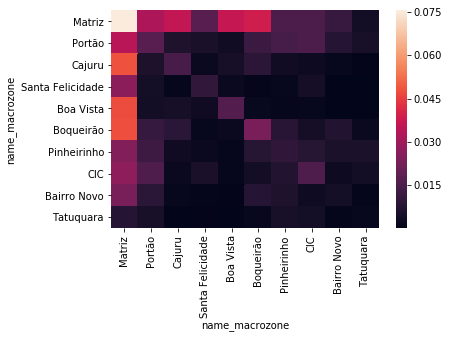

In [65]:
sns.heatmap(may_est_macrozones_norm_freqs)

## Generating May Estimated Trips OD Matrix for Zones

In [66]:
may_est_zones_trips = may_est_trips_zones.groupby(['cod_zona_o','cod_zona_d']).cardNum.count().reset_index(name='num_pass')

In [67]:
may_est_zones_trips

,cod_zona_o,cod_zona_d,num_pass
0,301,301,65
1,301,302,298
2,301,303,223
3,301,311,67
4,301,321,219
5,301,331,169
6,301,341,1004
7,301,351,2559
8,301,361,547
9,301,362,472


In [68]:
may_est_zones_freqs = may_est_zones_trips.pivot(index='cod_zona_o',columns='cod_zona_d',values='num_pass').fillna(0)

In [69]:
may_est_zones_freqs

cod_zona_d,301,302,303,311,321,331,341,351,361,362,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
301,65.0,298.0,223.0,67.0,219.0,169.0,1004.0,2559.0,547.0,472.0,...,348.0,68.0,293.0,108.0,145.0,252.0,39.0,24.0,346.0,50.0
302,268.0,9.0,27.0,37.0,266.0,0.0,340.0,107.0,35.0,91.0,...,16.0,33.0,12.0,20.0,18.0,122.0,116.0,128.0,713.0,120.0
303,20.0,546.0,741.0,45.0,2805.0,1345.0,1518.0,6428.0,1802.0,443.0,...,744.0,753.0,884.0,245.0,635.0,874.0,2233.0,1957.0,2586.0,2246.0
311,99.0,39.0,120.0,110.0,20.0,1.0,94.0,41.0,25.0,249.0,...,1.0,4.0,1.0,0.0,0.0,23.0,18.0,8.0,22.0,15.0
321,255.0,289.0,803.0,57.0,31.0,1.0,249.0,103.0,62.0,148.0,...,32.0,33.0,59.0,20.0,23.0,71.0,90.0,77.0,90.0,54.0
331,1215.0,17.0,1240.0,16.0,72.0,1.0,68.0,60.0,13.0,15.0,...,28.0,22.0,37.0,36.0,31.0,51.0,4.0,3.0,20.0,8.0
341,1289.0,560.0,818.0,469.0,189.0,56.0,5.0,202.0,203.0,117.0,...,35.0,19.0,36.0,18.0,28.0,24.0,91.0,59.0,265.0,74.0
351,1298.0,364.0,2197.0,58.0,119.0,34.0,107.0,20.0,464.0,231.0,...,135.0,70.0,104.0,47.0,43.0,38.0,177.0,89.0,356.0,292.0
361,467.0,36.0,2628.0,120.0,81.0,16.0,58.0,79.0,42.0,32.0,...,67.0,76.0,87.0,25.0,23.0,60.0,409.0,269.0,406.0,380.0


In [70]:
may_est_zones_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/may_est_zones_freqs.csv')

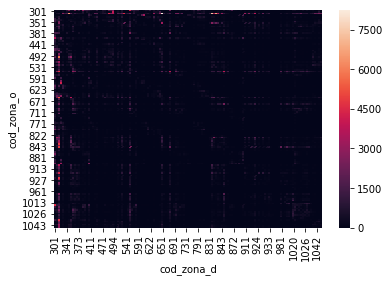

In [71]:
sns.heatmap(may_est_zones_freqs)

In [72]:
may_est_zones_norm_freqs = may_est_zones_freqs/may_est_zones_freqs.values.sum()

In [73]:
may_est_zones_norm_freqs

cod_zona_d,301,302,303,311,321,331,341,351,361,362,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
301,0.000037,1.675616e-04,1.253901e-04,3.767325e-05,0.000123,9.502657e-05,0.000565,0.001439,0.000308,0.000265,...,1.956760e-04,0.000038,1.647502e-04,0.000061,8.153167e-05,1.416964e-04,0.000022,1.349490e-05,1.945514e-04,2.811437e-05
302,0.000151,5.060586e-06,1.518176e-05,2.080463e-05,0.000150,0.000000e+00,0.000191,0.000060,0.000020,0.000051,...,8.996598e-06,0.000019,6.747449e-06,0.000011,1.012117e-05,6.859906e-05,0.000065,7.197279e-05,4.009109e-04,6.747449e-05
303,0.000011,3.070089e-04,4.166550e-04,2.530293e-05,0.001577,7.562765e-04,0.000854,0.003614,0.001013,0.000249,...,4.183418e-04,0.000423,4.970620e-04,0.000138,3.570525e-04,4.914392e-04,0.001256,1.100396e-03,1.454075e-03,1.262897e-03
311,0.000056,2.192921e-05,6.747449e-05,6.185161e-05,0.000011,5.622874e-07,0.000053,0.000023,0.000014,0.000140,...,5.622874e-07,0.000002,5.622874e-07,0.000000,0.000000e+00,1.293261e-05,0.000010,4.498299e-06,1.237032e-05,8.434311e-06
321,0.000143,1.625011e-04,4.515168e-04,3.205038e-05,0.000017,5.622874e-07,0.000140,0.000058,0.000035,0.000083,...,1.799320e-05,0.000019,3.317496e-05,0.000011,1.293261e-05,3.992240e-05,0.000051,4.329613e-05,5.060586e-05,3.036352e-05
331,0.000683,9.558886e-06,6.972364e-04,8.996598e-06,0.000040,5.622874e-07,0.000038,0.000034,0.000007,0.000008,...,1.574405e-05,0.000012,2.080463e-05,0.000020,1.743091e-05,2.867666e-05,0.000002,1.686862e-06,1.124575e-05,4.498299e-06
341,0.000725,3.148809e-04,4.599511e-04,2.637128e-04,0.000106,3.148809e-05,0.000003,0.000114,0.000114,0.000066,...,1.968006e-05,0.000011,2.024235e-05,0.000010,1.574405e-05,1.349490e-05,0.000051,3.317496e-05,1.490062e-04,4.160927e-05
351,0.000730,2.046726e-04,1.235345e-03,3.261267e-05,0.000067,1.911777e-05,0.000060,0.000011,0.000261,0.000130,...,7.590880e-05,0.000039,5.847789e-05,0.000026,2.417836e-05,2.136692e-05,0.000100,5.004358e-05,2.001743e-04,1.641879e-04
361,0.000263,2.024235e-05,1.477691e-03,6.747449e-05,0.000046,8.996598e-06,0.000033,0.000044,0.000024,0.000018,...,3.767325e-05,0.000043,4.891900e-05,0.000014,1.293261e-05,3.373724e-05,0.000230,1.512553e-04,2.282887e-04,2.136692e-04


In [74]:
may_est_zones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/may_est_zones_norm_freqs.csv')

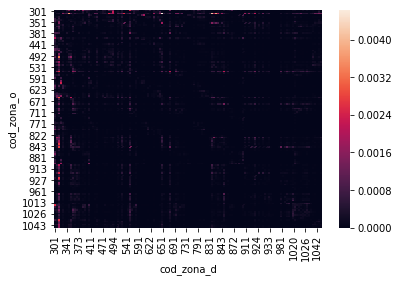

In [75]:
sns.heatmap(may_est_zones_norm_freqs)